In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv("car_prices.csv")

In [ ]:
# ცხრილის წაკითხვა

In [64]:
print(data.head(2))

   year make    model trim body transmission                vin state  \
0  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg566472    ca   
1  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg561319    ca   

   condition  odometer  color interior                   seller      mmr  \
0        5.0   16639.0  white    black  kia motors america  inc  20500.0   
1        5.0    9393.0  white    beige  kia motors america  inc  20800.0   

   sellingprice                                 saledate  
0       21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1       21500.0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  


In [9]:
print(data.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [ ]:
# ინდექსირება ცხრილის კონკრეტული სვეტის მიმართ

In [11]:
data_indexed = data.set_index('seller')
print(data_indexed.head())

                                        year   make                model  \
seller                                                                     
kia motors america  inc                 2015    Kia              Sorento   
kia motors america  inc                 2015    Kia              Sorento   
financial services remarketing (lease)  2014    BMW             3 Series   
volvo na rep/world omni                 2015  Volvo                  S60   
financial services remarketing (lease)  2014    BMW  6 Series Gran Coupe   

                                              trim   body transmission  \
seller                                                                   
kia motors america  inc                         LX    SUV    automatic   
kia motors america  inc                         LX    SUV    automatic   
financial services remarketing (lease)  328i SULEV  Sedan    automatic   
volvo na rep/world omni                         T5  Sedan    automatic   
financial services rema

In [ ]:
# 2 პარამეტრზე დამოკიდებული ფილტრი

In [12]:
filtered_data = data[(data['odometer'] > 10000) & (data['odometer'] < 200000)]
print(filtered_data)

        year       make    model                   trim       body  \
0       2015        Kia  Sorento                     LX        SUV   
3       2015      Volvo      S60                     T5      Sedan   
6       2014        BMW       M5                   Base      Sedan   
7       2014  Chevrolet    Cruze                    1LT      Sedan   
10      2014       Audi       A6  3.0T Prestige quattro      Sedan   
...      ...        ...      ...                    ...        ...   
558832  2015        Kia     K900                 Luxury      Sedan   
558833  2012        Ram     2500            Power Wagon   Crew Cab   
558834  2012        BMW       X5              xDrive35d        SUV   
558835  2015     Nissan   Altima                  2.5 S      sedan   
558836  2014       Ford    F-150                    XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
3    

In [ ]:
# ცხრილის დასორტირება ორი პარამეტრის მიხედვით

In [13]:
sorted_data = data.sort_values(by=['sellingprice', 'odometer'], ascending=[True, False])

In [14]:
print(sorted_data)

        year           make             model   trim          body  \
348252  1995          Isuzu             Rodeo     LS           SUV   
293223  2014           Ford      E-Series Van  E-250  E-Series Van   
48453   2003  Mercedes-Benz           E-Class   E500         Sedan   
7566    2002           Ford  F-350 Super Duty    XLT      Crew Cab   
406428  2005        Hyundai           Elantra    GLS         Sedan   
...      ...            ...               ...    ...           ...   
306447  2013        Hyundai            Sonata    GLS         Sedan   
537706  2012            Kia             Forte     LX         sedan   
431905  2013            Kia              Soul   Base         Wagon   
543129  2014        Hyundai            Accent    GLS         sedan   
457035  2014        Hyundai           Elantra     SE         Sedan   

       transmission                vin state  condition  odometer   color  \
348252          NaN  4s2cm58v9s4375559    va        1.0  254132.0     red   
29322

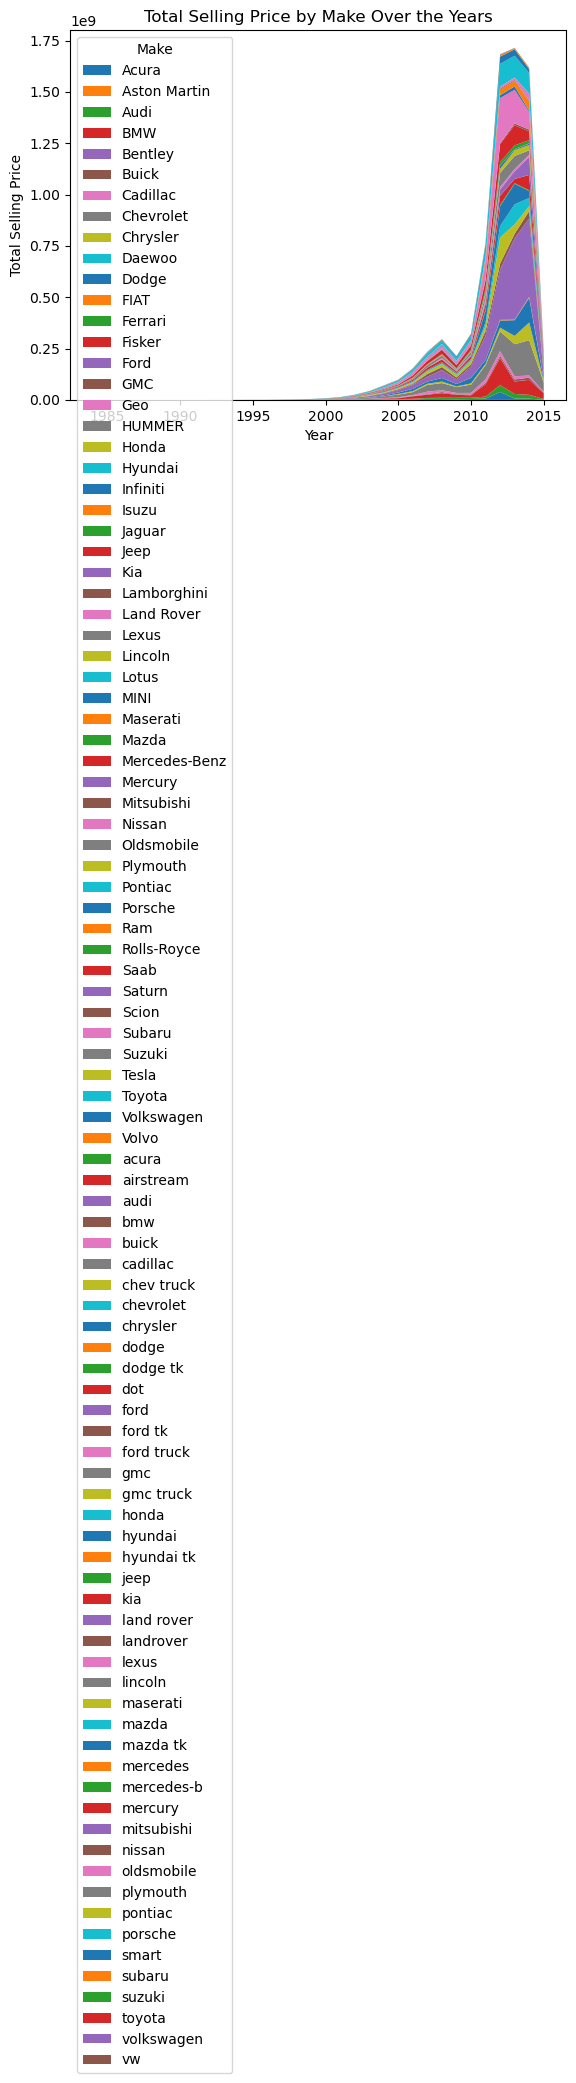

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

car_data = pd.read_csv("car_prices.csv")

# Group by 'year' and 'make' and sum up the 'sellingprice' for each group
grouped_data = car_data.groupby(['year', 'make'])['sellingprice'].sum().unstack(fill_value=0)

plt.stackplot(grouped_data.index, grouped_data.values.T, labels=grouped_data.columns)

plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.title('Total Selling Price by Make Over the Years')

plt.legend(title='Make', loc='upper left')

plt.show()

Missing values in the dataset:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


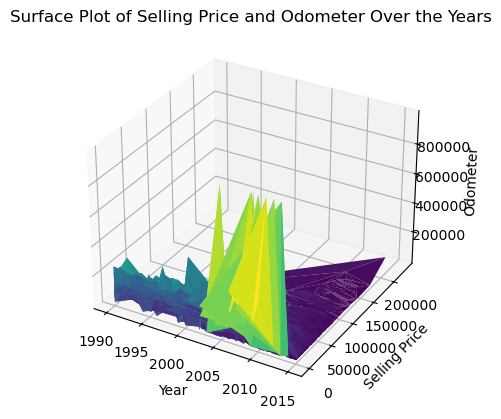

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

car_data = pd.read_csv("car_prices.csv")

missing_values = car_data.isna().sum()
print("Missing values in the dataset:")
print(missing_values)

car_data.dropna(inplace=True)  

year = car_data['year']
sellingprice = car_data['sellingprice']
odometer = car_data['odometer']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(year, sellingprice, odometer, cmap='viridis')

ax.set_xlabel('Year')
ax.set_ylabel('Selling Price')
ax.set_zlabel('Odometer')
ax.set_title('Surface Plot of Selling Price and Odometer Over the Years')

plt.show()